<a href="https://colab.research.google.com/github/naenumtou/statisticalModel/blob/main/LisaFaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [2]:
# Install library
!pip install face-recognition

In [3]:
# Change working directory
%cd /content/drive/My Drive/Colab Notebooks/LisaFaces

/content/drive/My Drive/Colab Notebooks/LisaFaces


In [4]:
# Import libraries
import face_recognition
import os
import cv2
import matplotlib.pyplot as plt

# Config
%config InlineBackend.figure_format = 'retina' #Retina display

In [5]:
# Create dataset
inputPath = os.path.join(
    os.getcwd(), 'train'
)

faces = []
names = []

for fileName in os.listdir(inputPath):
  print(f'Processing image: {fileName}')
  image = face_recognition.load_image_file(os.path.join(inputPath, fileName))
  faceEncoded = face_recognition.face_encodings(image)[0]
  faces.append(faceEncoded)
  names.append('lisa')

Processing image: lisa3.jpg
Processing image: lisa1.jpg
Processing image: lisa5.jpg
Processing image: lisa6.jpg
Processing image: lisa4.jpg
Processing image: lisa2.jpg
Processing image: lisa7.jpg
Processing image: lisa8.jpg
Processing image: lisa9.jpg
Processing image: lisa10.jpg


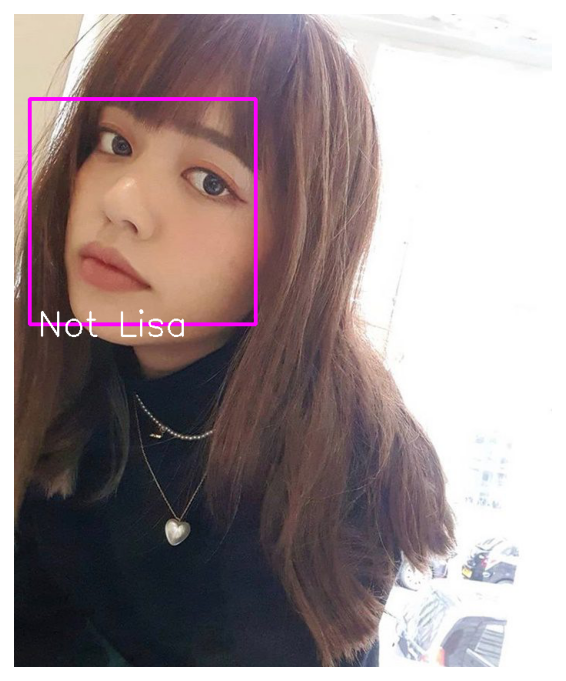

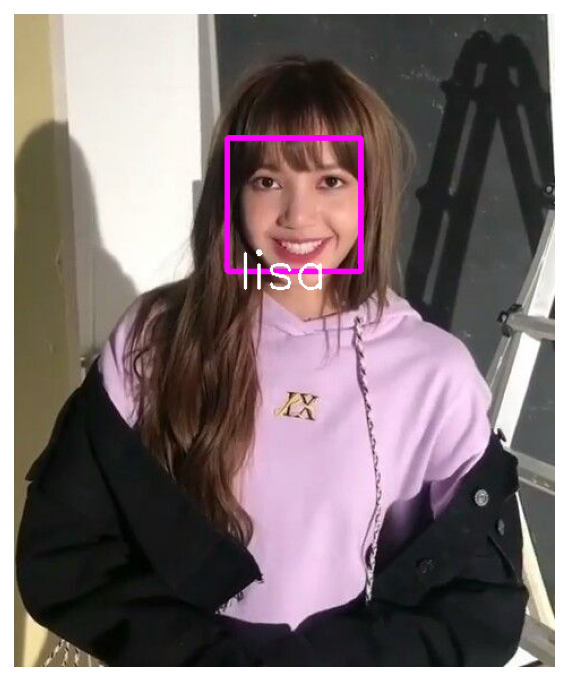

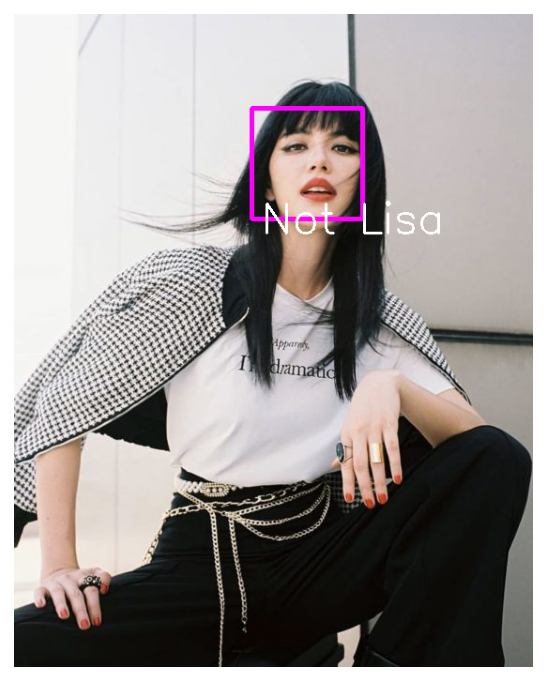

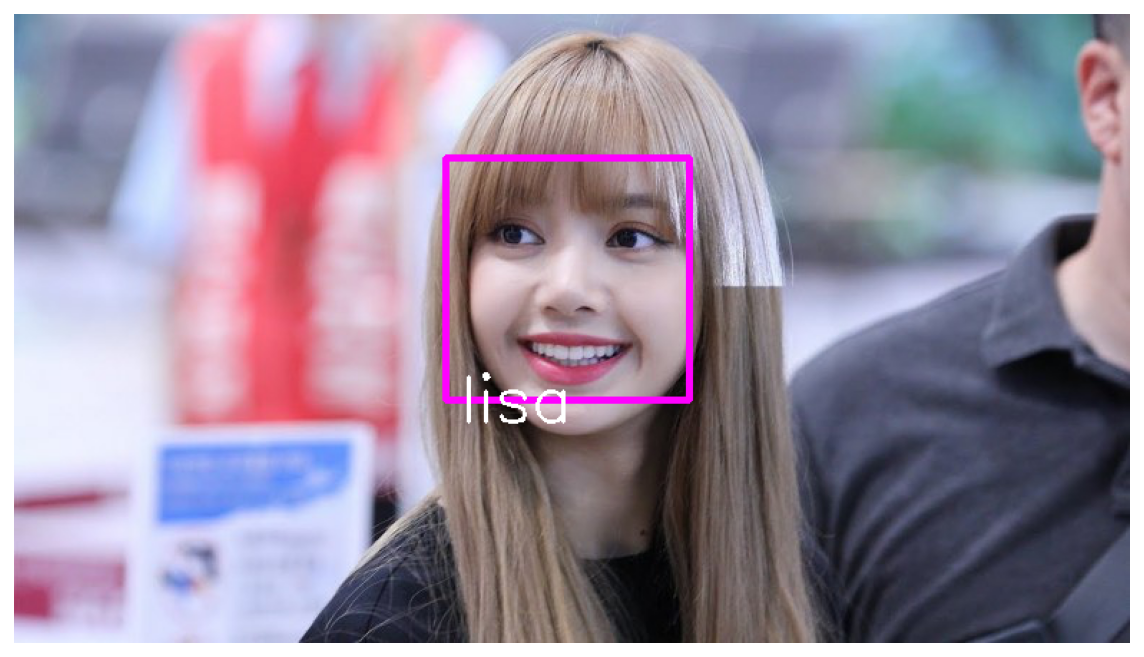

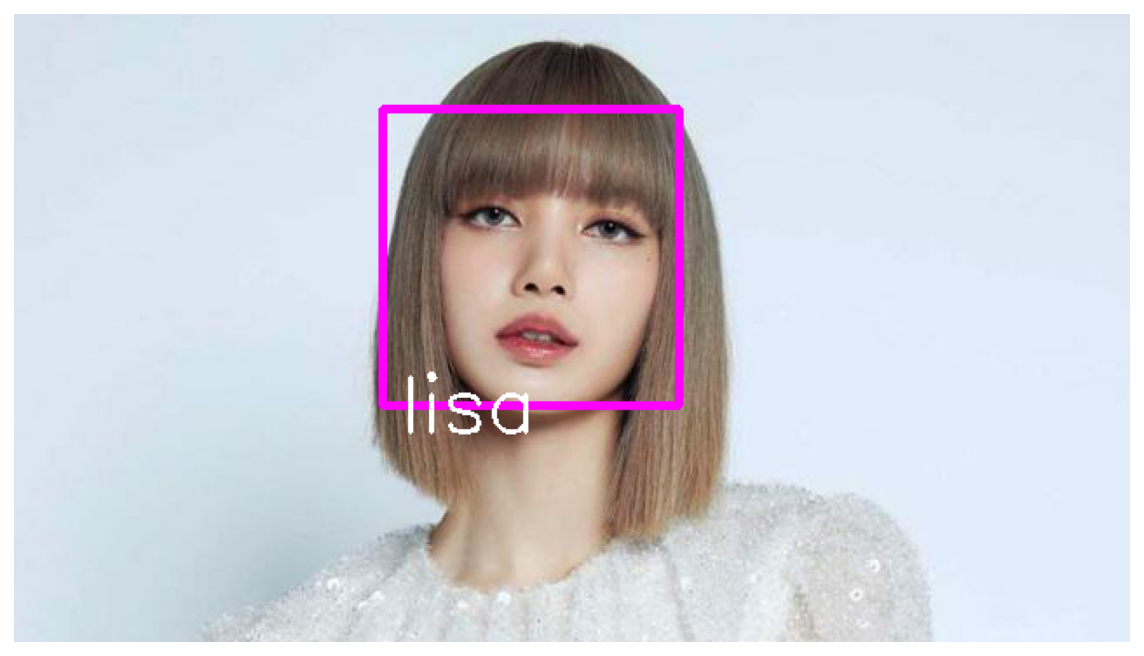

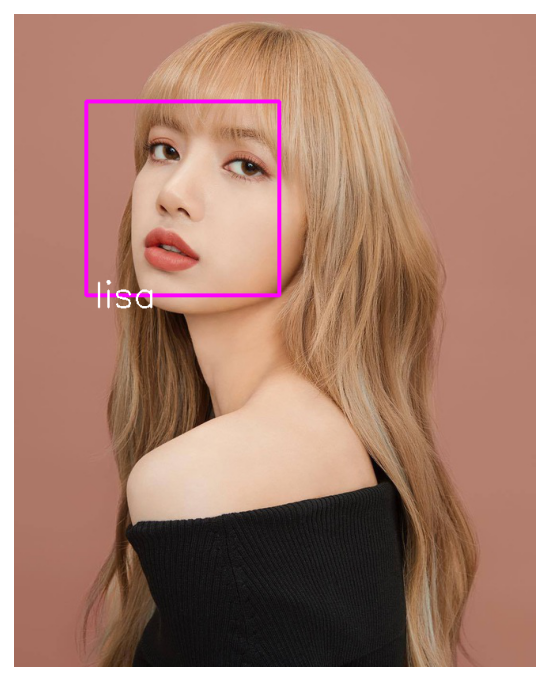

In [6]:
# Recognition
testPath = os.path.join(
    os.getcwd(), 'test'
)

for fileName in os.listdir(testPath):
  image = face_recognition.load_image_file(os.path.join(testPath, fileName))
  locations = face_recognition.face_locations(image, model = 'cnn')
  faceEncoded = face_recognition.face_encodings(image, locations)
  # Covert RGB to BGR
  for encode, location in zip(faceEncoded, locations):
    result = face_recognition.compare_faces(faces, encode, 0.4)
    if True in result:
      label = names[result.index(True)]
    else:
      label = 'Not Lisa'
    # Result
    imageDraw = image.copy()
    cv2.rectangle(
        imageDraw,
        (location[3], location[0]), #(x, y)
        (location[1], location[2]), #(x:x + w, y:y + h)
        [255, 0, 255],
        3
    )
    cv2.putText(
        imageDraw,
        label,
        (location[3] + 10, location[2] + 15),
        cv2.FONT_HERSHEY_SIMPLEX,
        1.5,
        [255, 255, 255],
        2
    )
    # Show result
    plt.figure(figsize = (10, 6))
    plt.imshow(imageDraw)
    plt.axis('off')
    plt.show()